# KNN
 
 
-KNN can be used for both classification and regression task
-KNN is a non linear model.
-KNN is also called as lazy algorithm.
-KNN is uses similiarity or distance calculation for classification and regression (Euclidean/manhattan)
-KNN is computationally very expensive
-KNN is very easy to implement and interpret

In [1]:
#Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.metrics import classification_report , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Data

In [4]:
df = pd.read_csv(r"C:\Users\bodak\Downloads\pima-indians-diabetes.data (1).csv")

In [5]:
df.head()

,Pregnacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Describe the Data

In [6]:
df.describe()

,Pregnacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 150

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

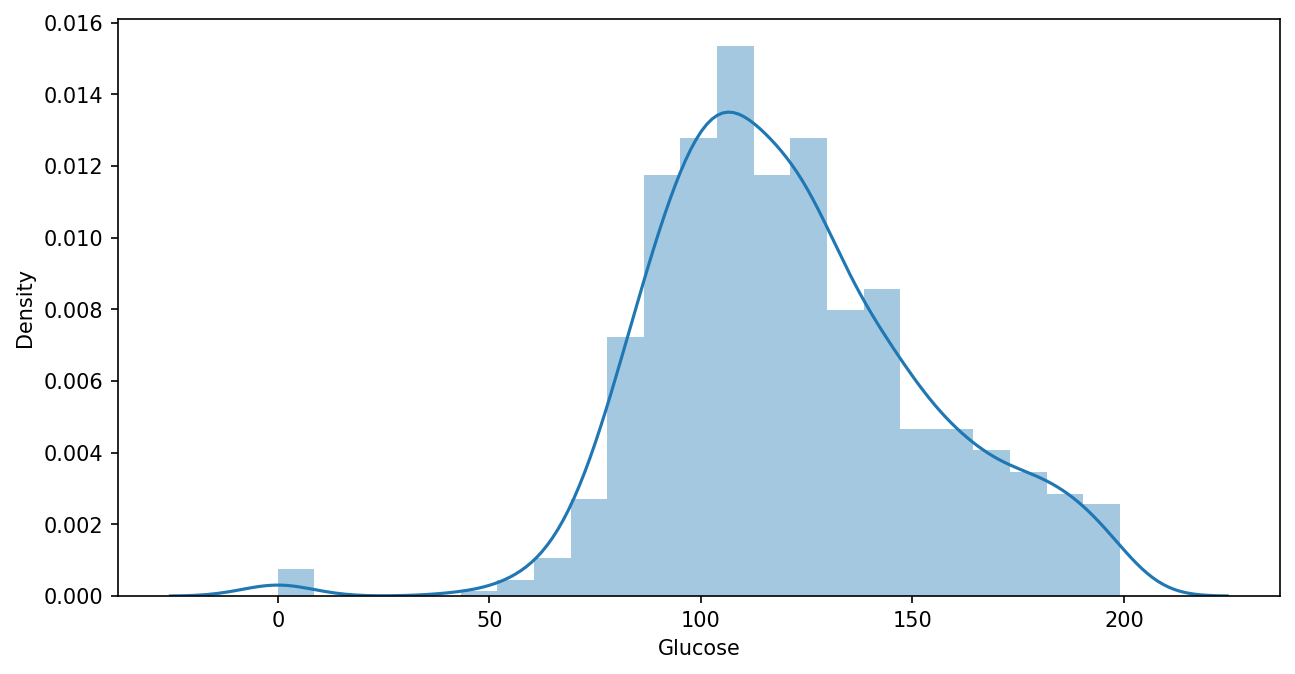

In [8]:
sns.distplot(df['Glucose'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

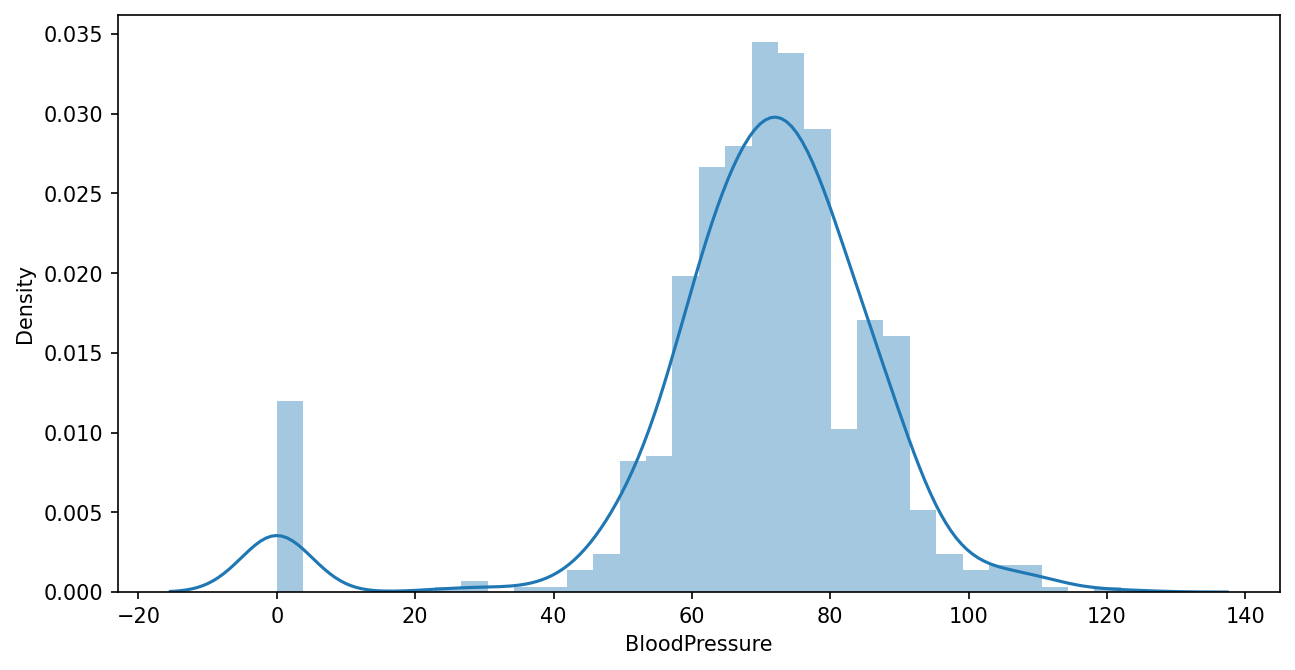

In [9]:
sns.distplot(df['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

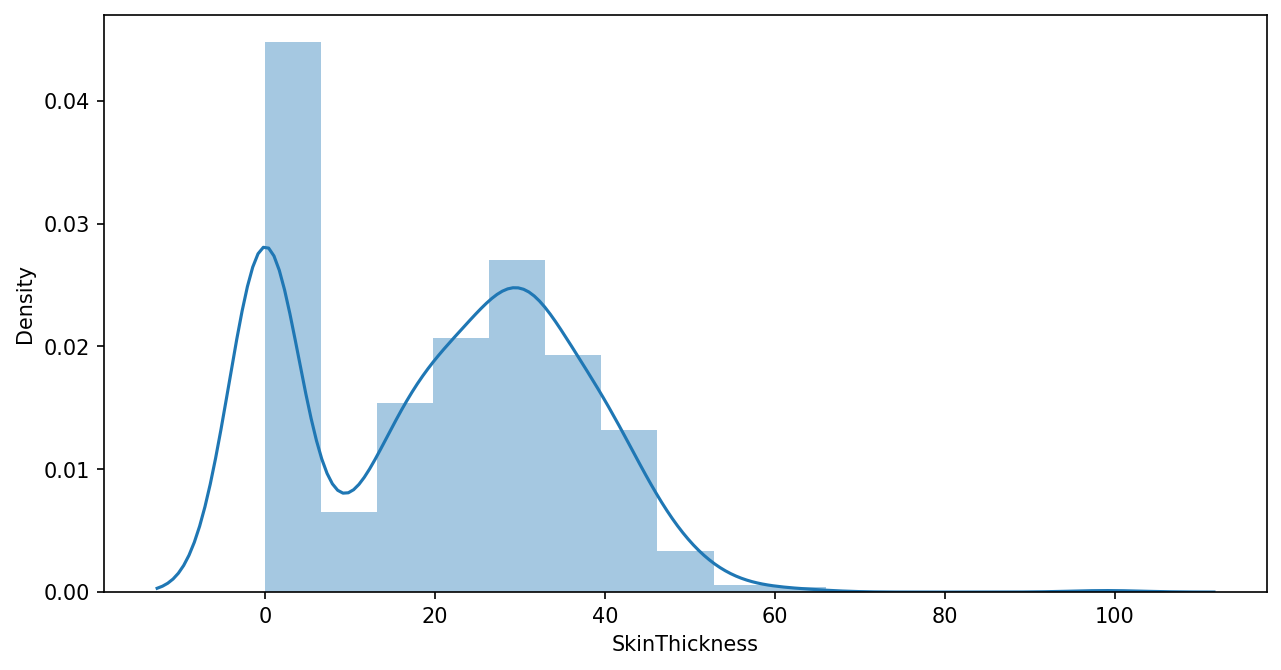

In [10]:
sns.distplot(df['SkinThickness'])

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

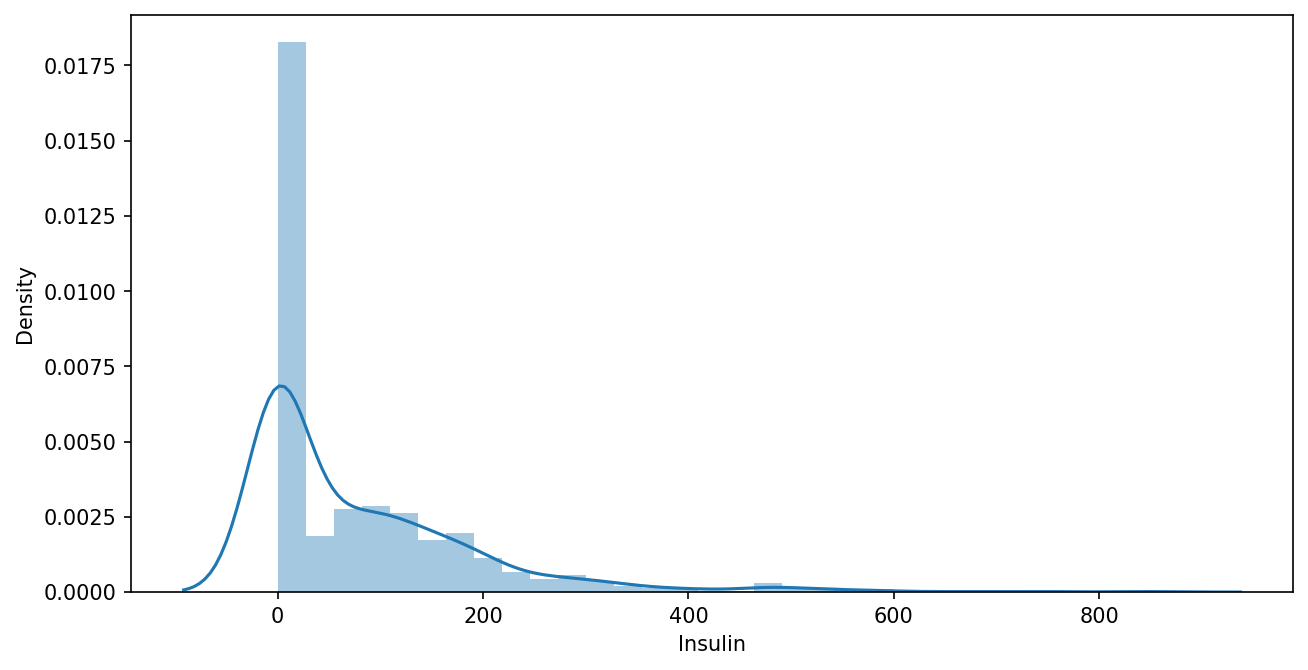

In [11]:
sns.distplot(df['Insulin'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

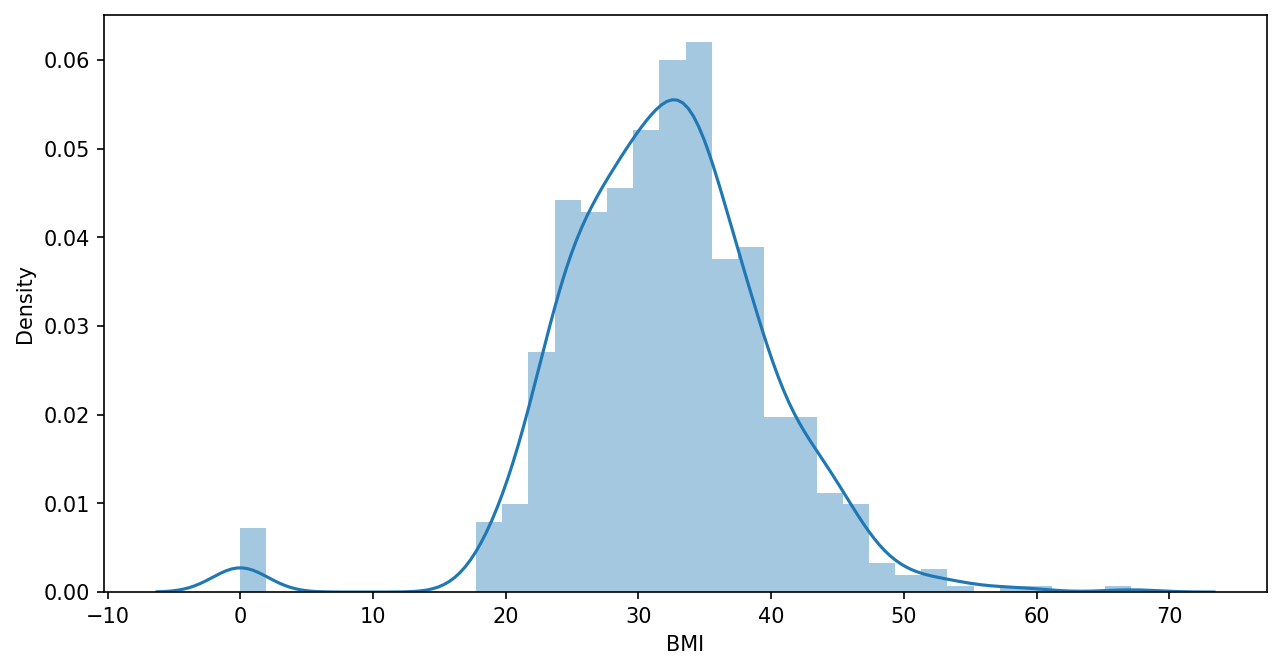

In [12]:
sns.distplot(df['BMI'])

<AxesSubplot:>

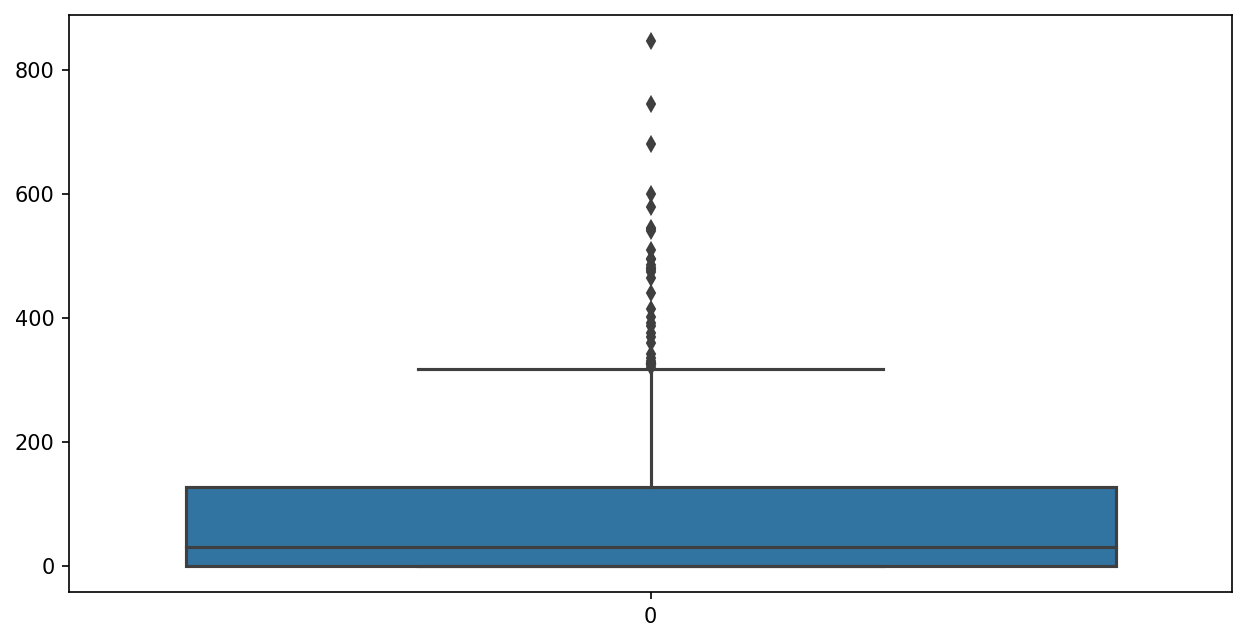

In [13]:
sns.boxplot(df['Insulin'])

# Checking Null Values

In [14]:
df.isna().sum()

Pregnacies                  0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
#Vizualize null values

<AxesSubplot:>

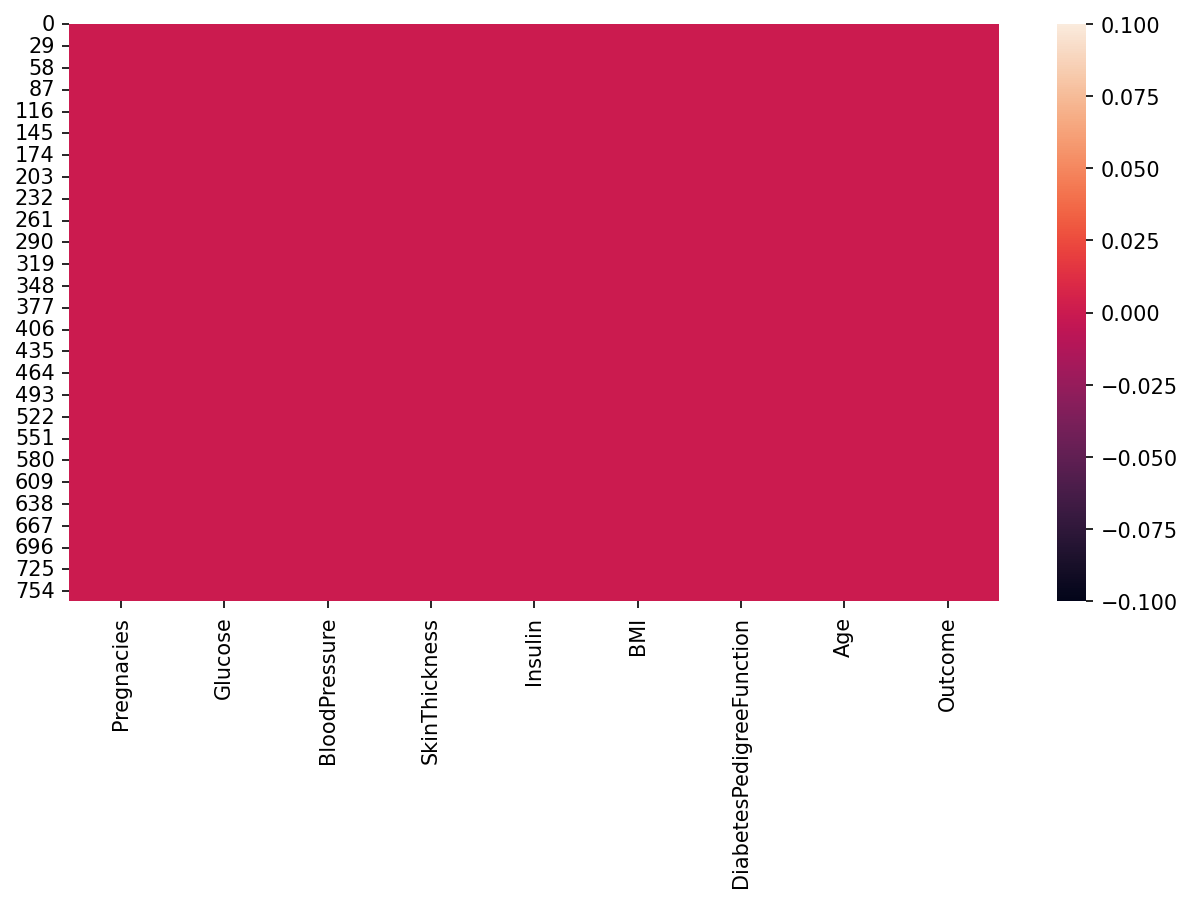

In [16]:
sns.heatmap(df.isna())

In [17]:
df.loc[:,'Glucose':'BMI'].replace(0 , np.nan)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [18]:
df.describe()

,Pregnacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.loc[:,'Glucose':'BMI'] = df.loc[:,'Glucose':'BMI'].replace(0,np.nan)

In [20]:
df.describe()

,Pregnacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

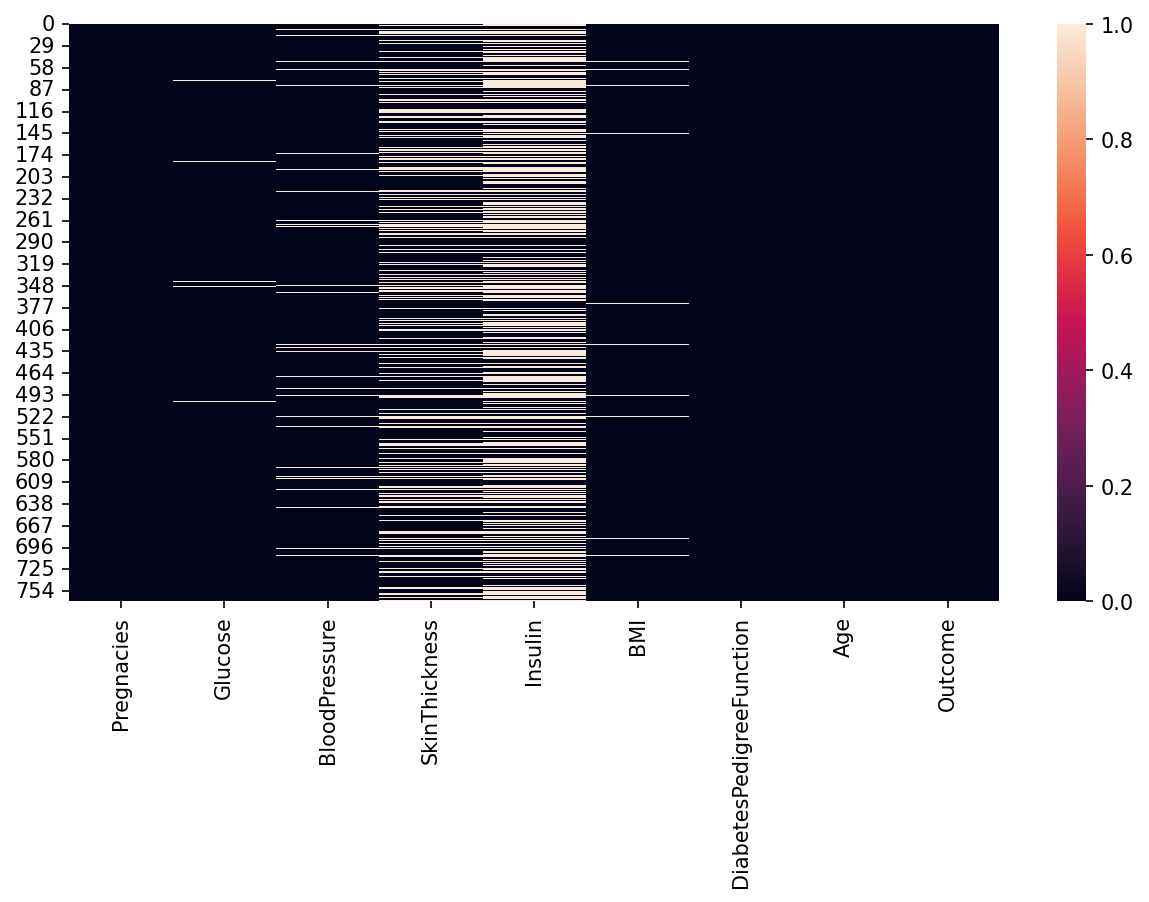

In [21]:
sns.heatmap(df.isna())

In [22]:
df.isna().sum()

Pregnacies                    0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Correlation Analysis

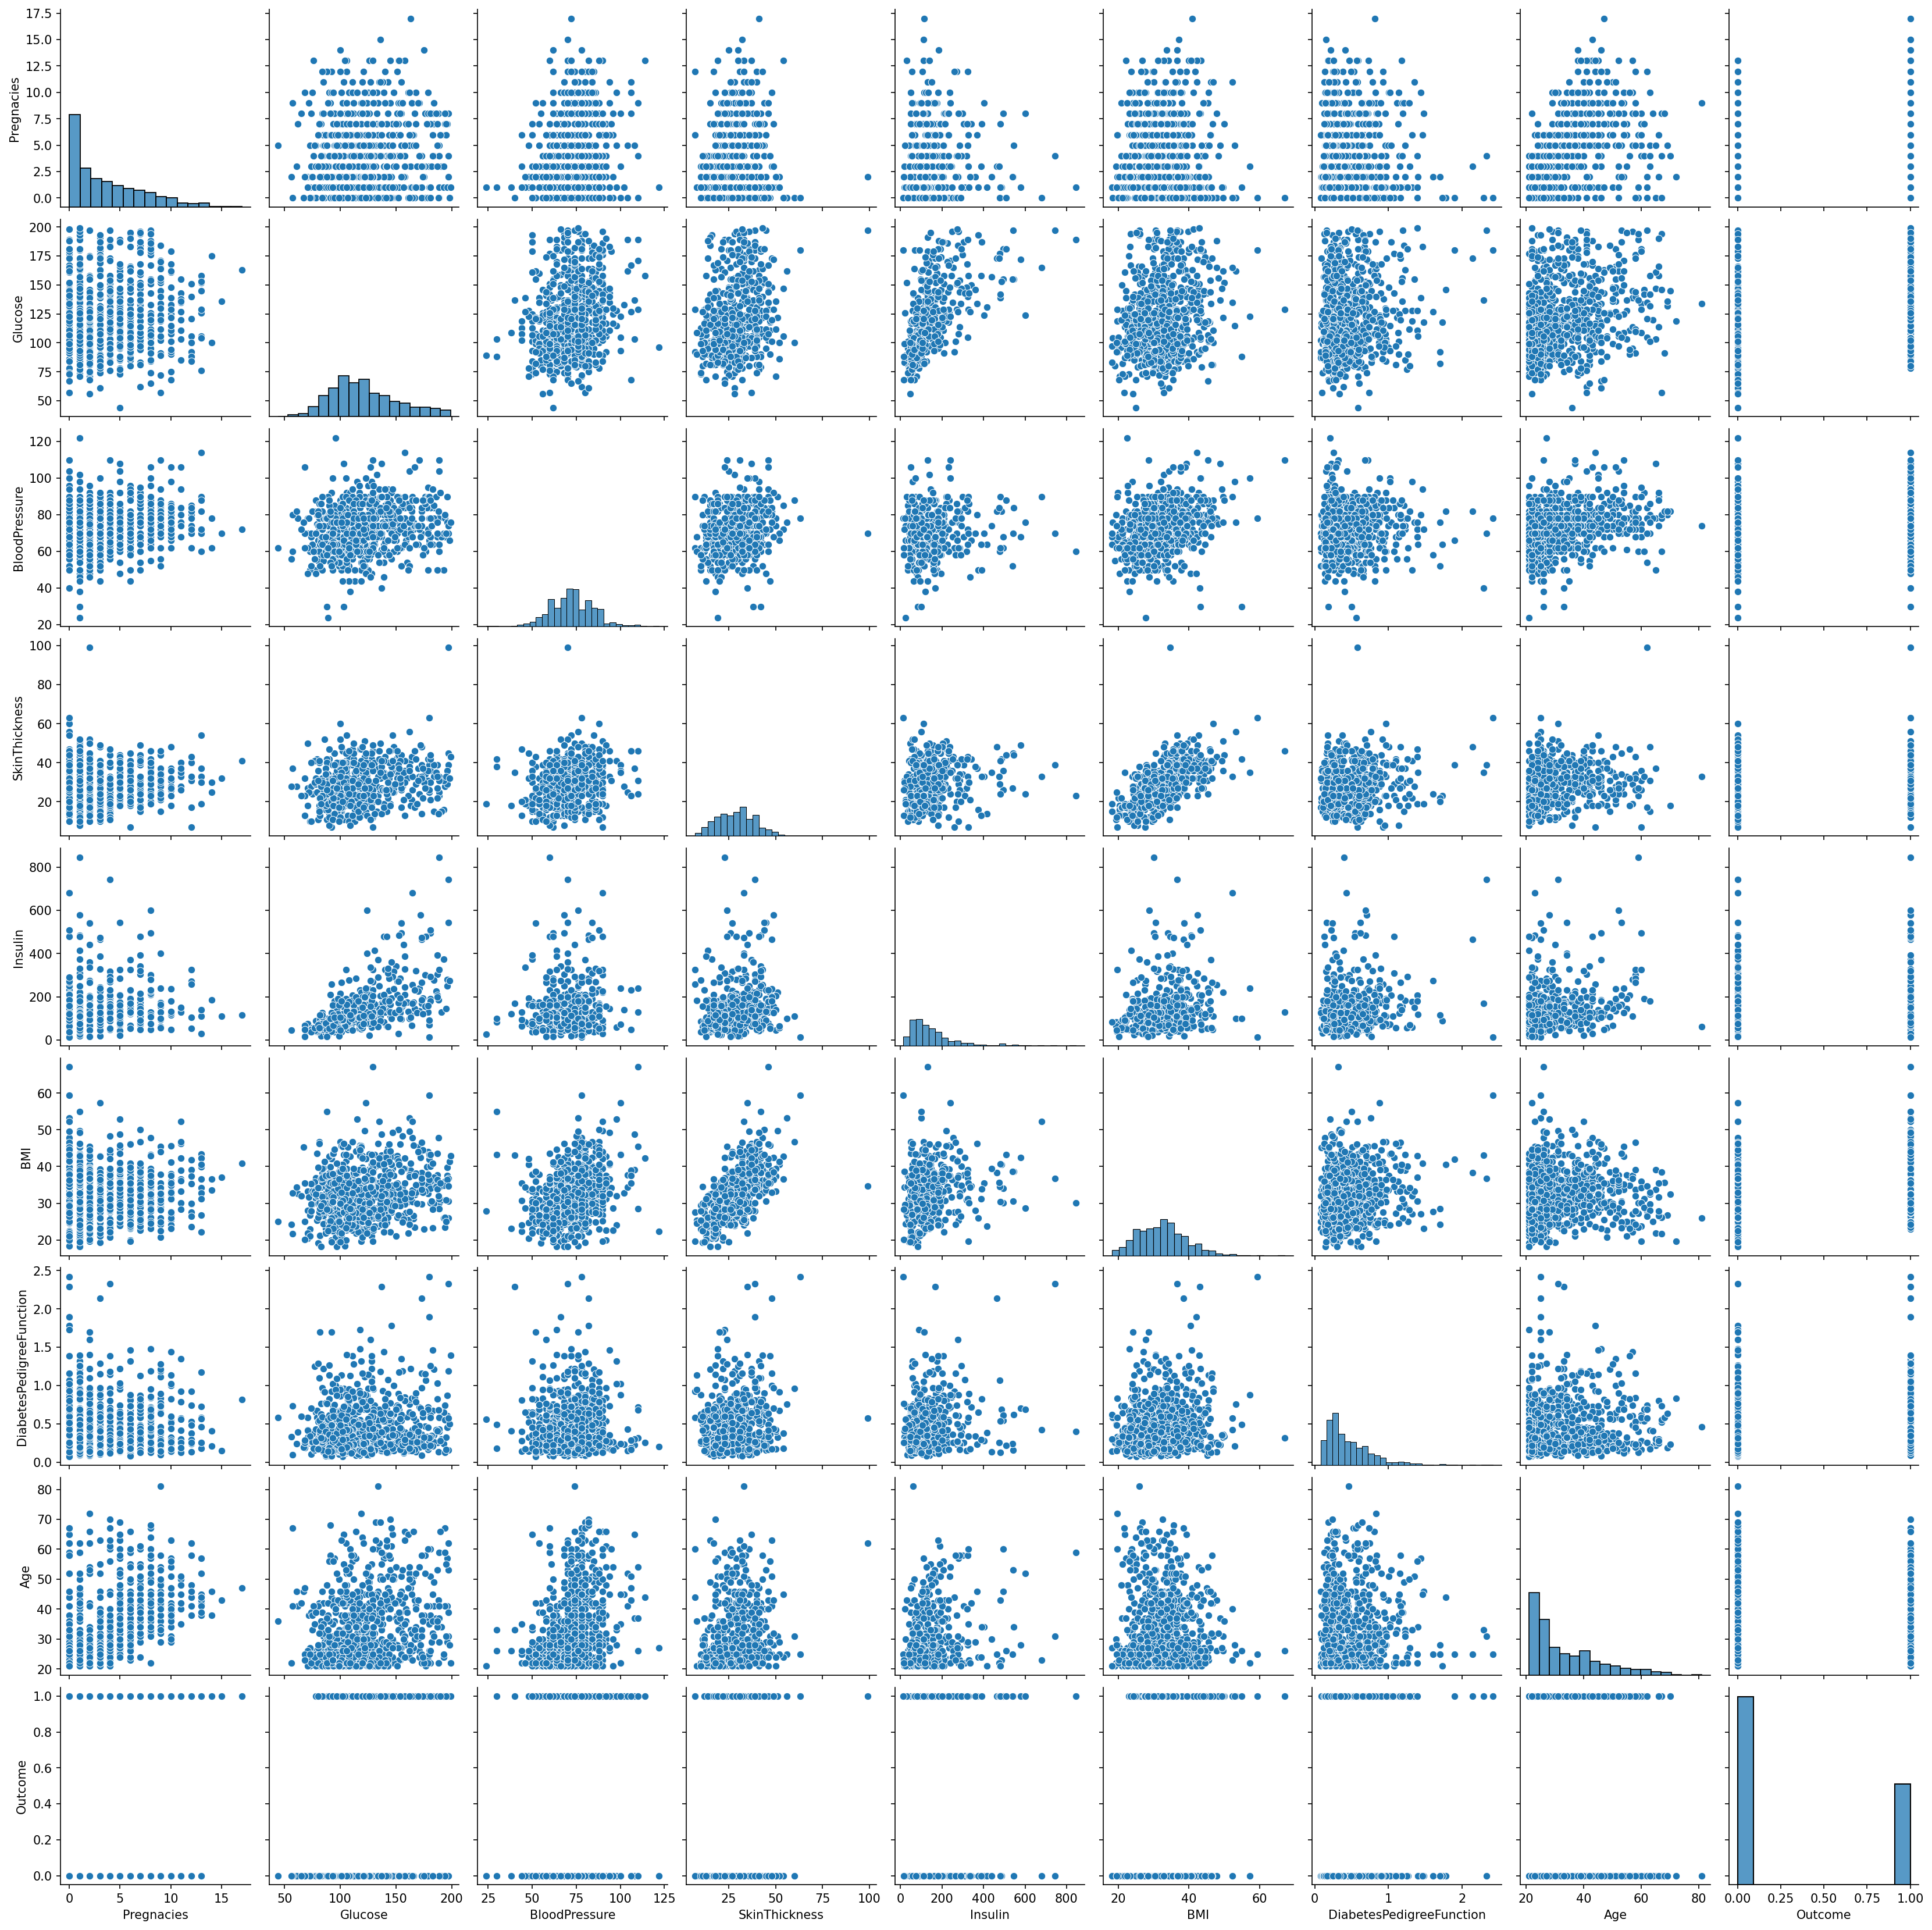

In [23]:
sns.pairplot(df)

In [24]:
df.corr()

,Pregnacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnacies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

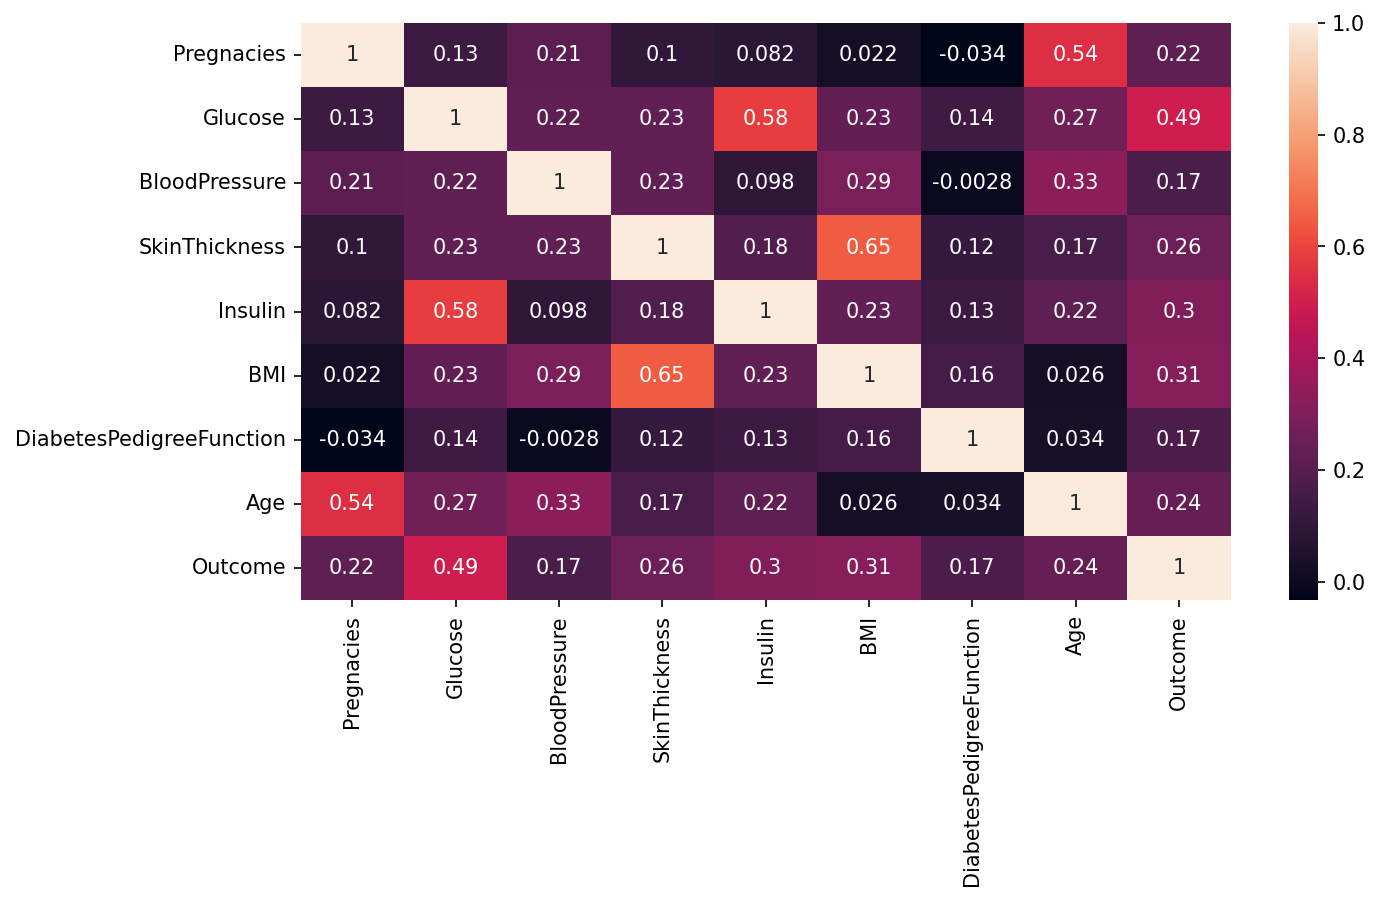

In [25]:
sns.heatmap(df.corr(), annot=True)

In [26]:
#Histogram

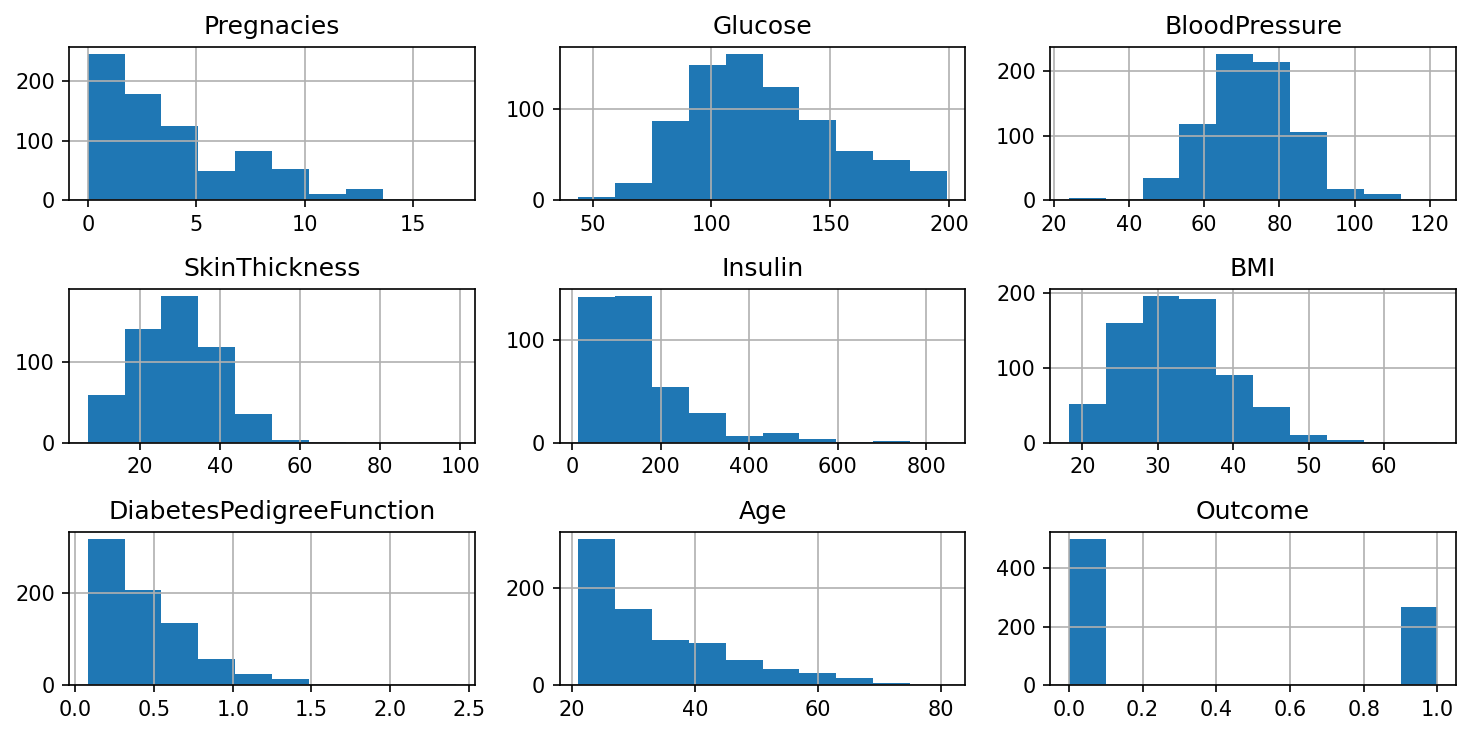

In [27]:
df.hist()
plt.tight_layout()

# Missing Value imputation

In [28]:
df.isna().sum()

Pregnacies                    0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [29]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median)

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
si = SimpleImputer(strategy='median')

In [32]:
si

SimpleImputer(strategy='median')

In [33]:
df[['BloodPressure','SkinThickness','Insulin','BMI']] = si.fit_transform(df[['BloodPressure','SkinThickness','Insulin','BMI']])

In [34]:
df.isna().sum()

Pregnacies                  0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Model Building

In [35]:
df2 = pd.read_csv(r"C:\Users\bodak\Downloads\pima-indians-diabetes.data (1).csv")

In [36]:
df2

,Pregnacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [37]:
X = df2.iloc[:,[0,1,2,3,4,5,6,7]]
Y = df2.iloc[:,-1]

In [38]:
#Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()

In [41]:
sc

StandardScaler()

In [42]:
sc.fit_transform(X)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [43]:
X= pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [44]:
X

,Pregnacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [45]:
X['Glucose'].mean()

3.614007241618348e-18

In [46]:
X['Glucose'].std()

1.0006516781401995

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

In [51]:
def predict(model):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    trainac = model.score(X_train,Y_train)
    testac = model.score(X_test,Y_test)
    
    print(f"Train AC {trainac}\nTest AC {testac}")
    

In [52]:
predict(KNeighborsClassifier())

Train AC 0.8194444444444444
Test AC 0.796875


# Hyperparameter Tuning For KNN

In [53]:
trainac = []
testac = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    
    trainac.append(knn.score(X_train,Y_train))
    testac.append(knn.score(X_test,Y_test))

In [54]:
trainac

[1.0,
 0.8454861111111112,
 0.8420138888888888,
 0.8055555555555556,
 0.8194444444444444,
 0.8020833333333334,
 0.8020833333333334,
 0.78125,
 0.7864583333333334,
 0.7708333333333334,
 0.7725694444444444,
 0.7690972222222222,
 0.7708333333333334,
 0.7638888888888888,
 0.7725694444444444,
 0.7708333333333334,
 0.7795138888888888,
 0.7777777777777778,
 0.7864583333333334,
 0.78125]

In [55]:
testac

[0.7135416666666666,
 0.6927083333333334,
 0.7291666666666666,
 0.7291666666666666,
 0.796875,
 0.7708333333333334,
 0.78125,
 0.796875,
 0.7864583333333334,
 0.7916666666666666,
 0.7708333333333334,
 0.78125,
 0.7864583333333334,
 0.78125,
 0.78125,
 0.7760416666666666,
 0.7760416666666666,
 0.7760416666666666,
 0.765625,
 0.7760416666666666]

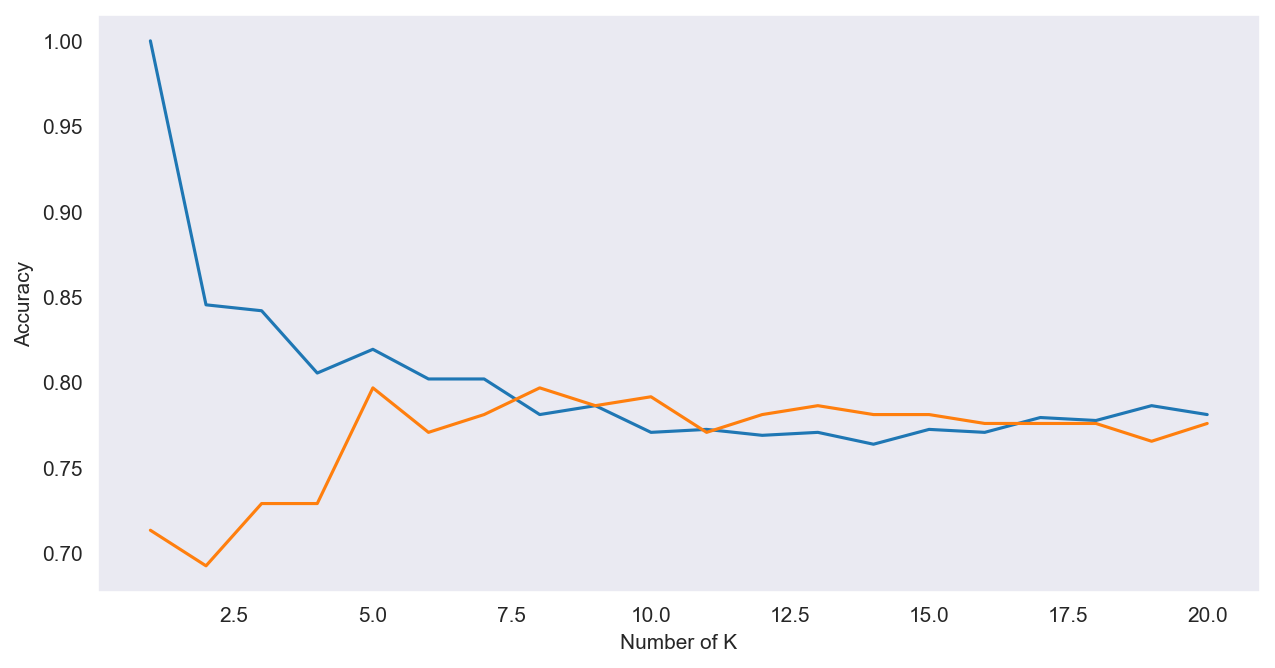

In [56]:
sns.set_style('darkgrid')
plt.plot(range(1,21),trainac)
plt.plot(range(1,21),testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [57]:
predict(KNeighborsClassifier(n_neighbors=11))

Train AC 0.7725694444444444
Test AC 0.7708333333333334
